In [3]:
import tensorflow as tf
import numpy as np

This code will create 3 random 2d vectors and then rotate them at a random angle. The initial and rotated traingles will be drawn. 

In [4]:
random_vector_0 = tf.Variable(tf.random_normal((2,1), 0, 1), name = 'rv0')
random_vector_1 = tf.Variable(tf.random_normal((2, 1), 0, 1), name = 'rv1')
random_vector_2 = tf.Variable(tf.random_normal((2, 1), 0, 1), name = 'rv2')

In [5]:
random_angle = tf.Variable(tf.random_uniform((), 0, 2*np.pi))

In [6]:
random_entries = [tf.cos(random_angle), -tf.sin(random_angle), tf.sin(random_angle), tf.cos(random_angle)]

In [5]:
random_rotation = tf.reshape(random_entries, [2,2])

In [6]:
random_rotation, random_vector_0

(<tf.Tensor 'Reshape:0' shape=(2, 2) dtype=float32>,
 <tf.Variable 'rv0:0' shape=(2, 1) dtype=float32_ref>)

In [7]:
new_vector_0 = tf.matmul(random_rotation, random_vector_0)
new_vector_1 = tf.matmul(random_rotation, random_vector_1)
new_vector_2 = tf.matmul(random_rotation, random_vector_2)

In [8]:
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
        sess.run(init)
        rv_0, rv_1, rv_2 = random_vector_0.eval(), random_vector_1.eval(), random_vector_2.eval()
        rr = sess.run(random_rotation)
        nv_0, nv_1, nv_2 = sess.run([new_vector_0, new_vector_1, new_vector_2])

In [10]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

[<tf.Variable 'rv0:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'rv1:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'rv2:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'Variable:0' shape=() dtype=float32_ref>]

In [11]:
rv_0, rr, nv_0

(array([[ 1.29400992],
        [ 0.74275494]], dtype=float32), array([[-0.38979888, -0.92089999],
        [ 0.92089999, -0.38979888]], dtype=float32), array([[-1.18840659],
        [ 0.9021287 ]], dtype=float32))

In [12]:
new_vector_0

<tf.Tensor 'MatMul:0' shape=(2, 1) dtype=float32>

Let's plot the two triangles.

In [13]:
import matplotlib.pyplot as plt

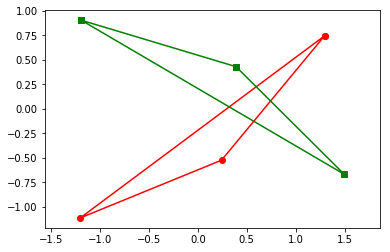

In [14]:
plt.plot([rv_0[0], rv_1[0], rv_2[0], rv_0[0]], [rv_0[1], rv_1[1], rv_2[1], rv_0[1]], 'r-o')
plt.plot([nv_0[0], nv_1[0], nv_2[0], nv_0[0]], [nv_0[1], nv_1[1], nv_2[1], nv_0[1]], 'g-s')
plt.axis('equal')
plt.show()